### Importing Dependencies for Python 

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import ggplot as gg
import matplotlib.pyplot as plt
import scipy
plt.style.use('bmh')
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Importing Dependencies for R

In [361]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
import rpy2.robjects.packages as rpackages #Function to install R packages directly from Python 
utils = rpackages.importr("utils") #Importing the "utils" packages
utils.chooseCRANmirror(ind=1)
%reload_ext rpy2.ipython

# Opening the Dataset

In [787]:
df = pd.read_csv('file:///Users/Sauraj/Desktop/Datasets/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### The age column in the dataset is missing, hence the average age of 30 years has been replaced with NaN values in the dataset

In [363]:
df['Age'] = df['Age'].fillna(30)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [464]:
#Converting Pandas dataframe for R interface
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

r_df = pandas2ri.py2ri(df)
print(r_df)

    PassengerId Survived Pclass    Sex   Age SibSp Parch Embarked Sex_encoded
0             1        0      3   male 22.00     1     0        S           1
1             2        1      1 female 38.00     1     0        C           0
2             3        1      3 female 26.00     0     0        S           0
3             4        1      1 female 35.00     1     0        S           0
4             5        0      3   male 35.00     0     0        S           1
5             6        0      3   male 30.00     0     0        Q           1
6             7        0      1   male 54.00     0     0        S           1
7             8        0      3   male  2.00     3     1        S           1
8             9        1      3 female 27.00     0     2        S           0
9            10        1      2 female 14.00     1     0        C           0
10           11        1      3 female  4.00     1     1        S           0
11           12        1      1 female 58.00     0     0        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "FareBand". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


### Basic information about the dataset

Most datasets are never fully complete and often come with either misinterpreted or missing data values, hence to ensure that such data values are present, we need to analyze the dataset by seeing its count values.

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some missing data values exist for 
1. Age
2. Cabin
3. Embarked
 
The most troublesome being 'Cabin' with 685 missing values in it, hence it is better to drop the column completely than to retain it and distort the analysis

Looking at age, it is possible to fill in the missing values with the average age of the passengers dataset, 30, which has been already filled as the age count has become 891.

In [366]:
df.drop(['Cabin'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [367]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

The first step to doing analysis of the dataset is to find patterns and correlations amongst features before statistical tests can be conducted.

The first part is to do a simple exploratory analysis on the basic features of the dataset

Text(0.5,1,'Passengers per boarding location')

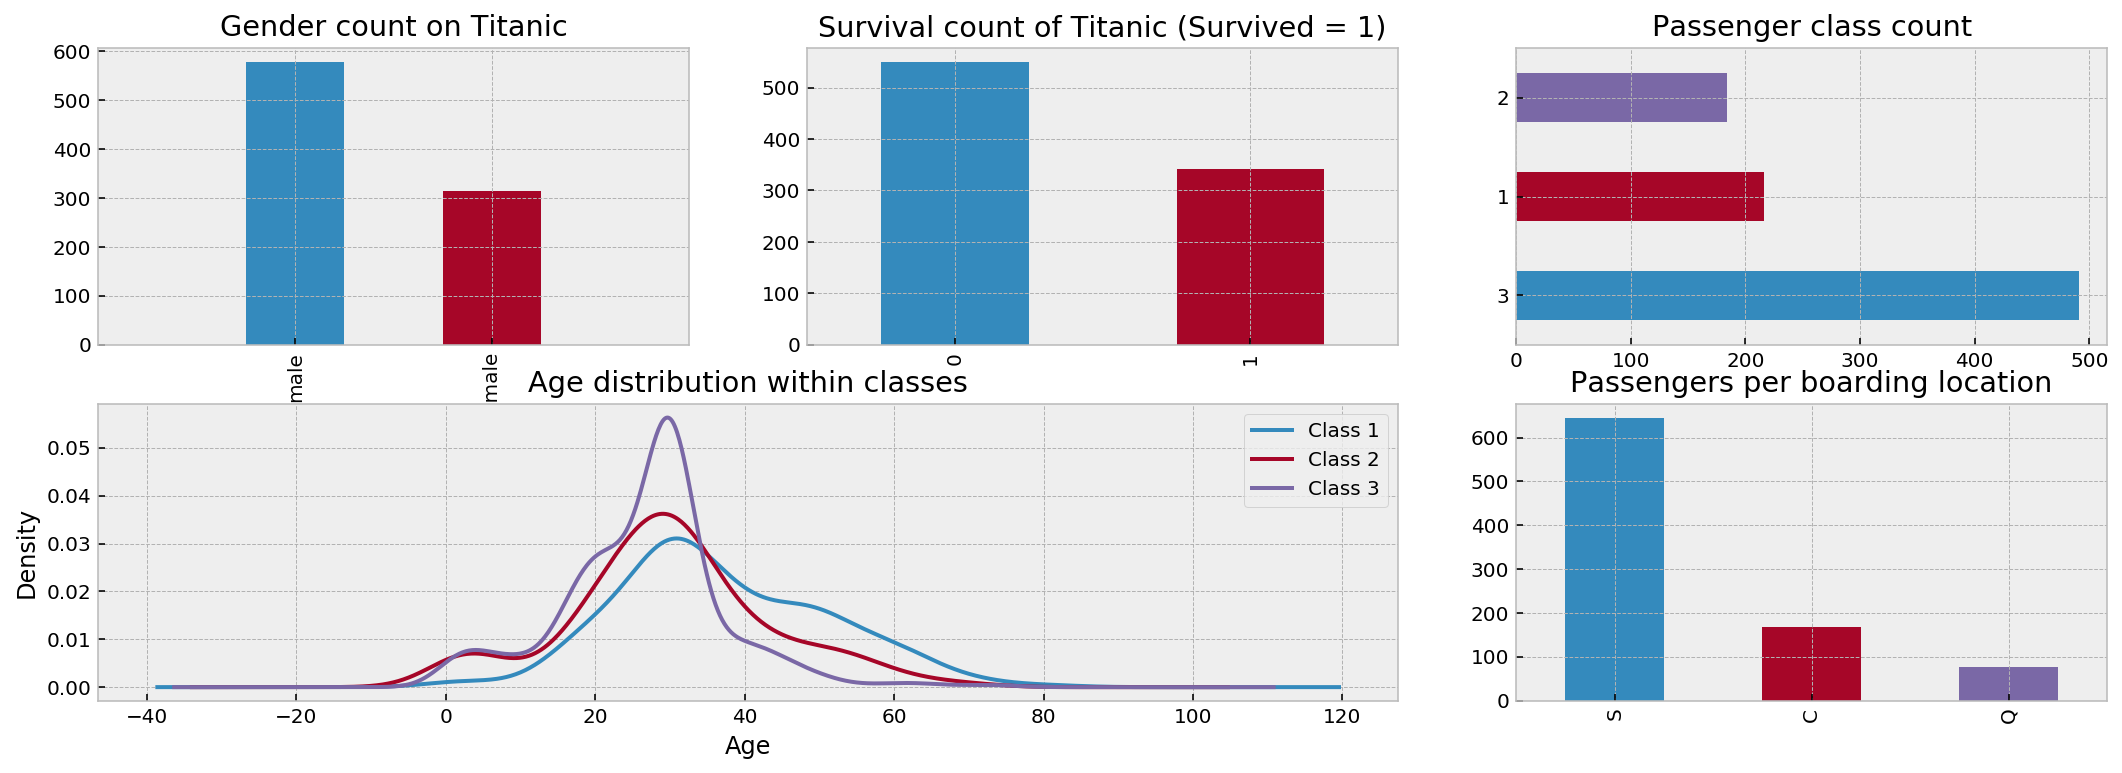

In [368]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2, 3), (0, 0))
df.Sex.value_counts().plot(kind='bar')
ax1.set_xlim(-1, 2)
plt.title("Gender count on Titanic")   

ax2 = plt.subplot2grid((2,3), (0,1))
df.Survived.value_counts().plot(kind='bar')
plt.title("Survival count of Titanic (Survived = 1)")

plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')

plt.title('Age distribution within classes')
plt.xlabel('Age')
plt.legend(('Class 1', 'Class 2', 'Class 3'), loc='best')

ax3 = plt.subplot2grid((2, 3), (0, 2))
df.Pclass.value_counts().plot(kind='barh')
plt.title("Passenger class count")

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar')
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Most of the passengers on the Titanic:
 
1. Boarded from Southampton 
2. Were in Class 3 (Economy class)
3. Were Male (Higher count)
4. Belonged to Class 3 with their age being young in age.

##### Some other visualizations

Text(0.5,1,'Violin plot of age with respect to Dead & Survived')

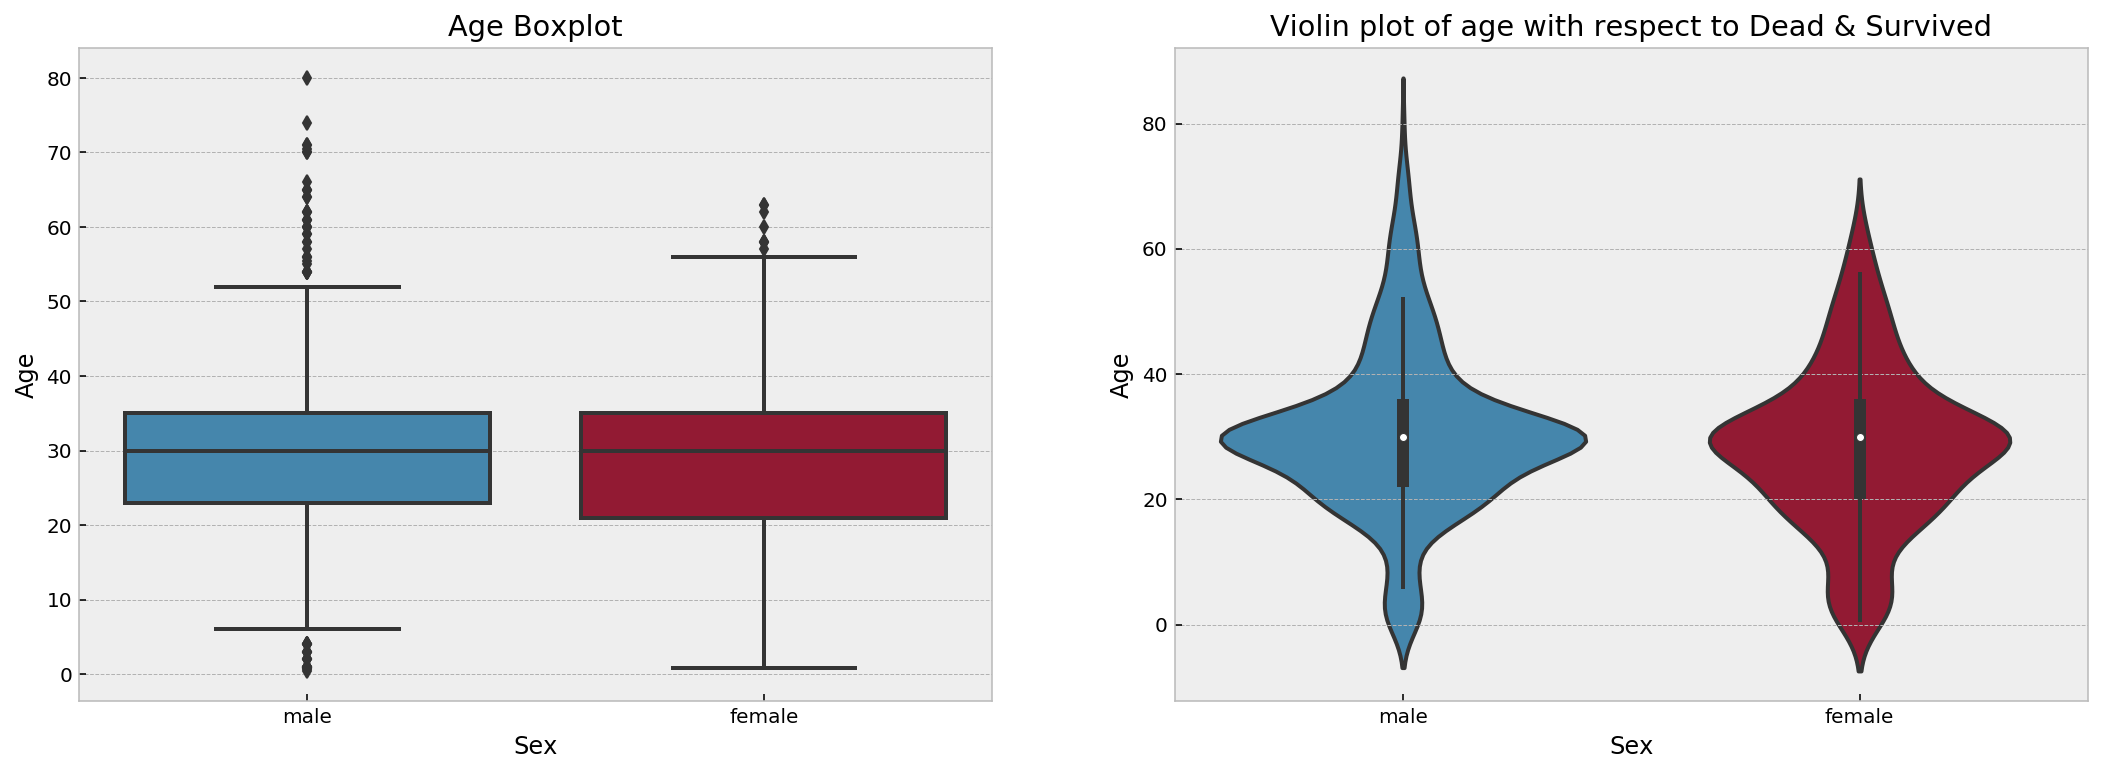

In [369]:
#Boxplot of Age with respect to gender
fig = plt.figure(figsize=(18,6))

ax21 = fig.add_subplot(121)
sns.boxplot(x="Sex", y="Age", data=df)
plt.title('Age Boxplot')

ax22 = fig.add_subplot(122)
sns.violinplot(x='Sex', y="Age", data=df, splits="True")
plt.title('Violin plot of age with respect to Dead & Survived')


Observing the Violinplot shows that the frequency Age distribution of passengers was between the age count of 20-40 years, the mean being 30 years of age.

Text(0.5,1,'Violin plot with points on the graph representing various ages')

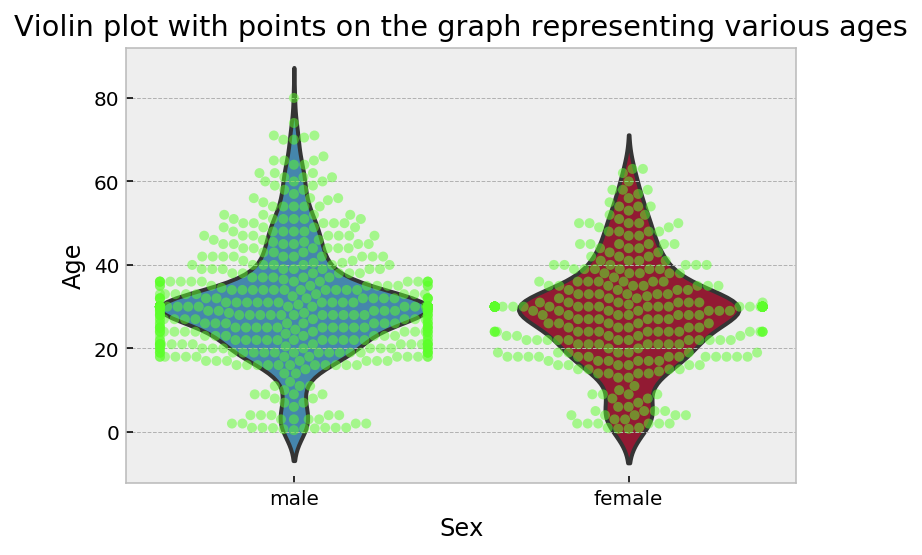

In [370]:
ax23 = fig.add_subplot(131)
sns.violinplot(x="Sex", y="Age", data=df, inner=None)
sns.swarmplot(x="Sex", y="Age", data=df, color="#5cff2a", alpha=.5)
plt.title('Violin plot with points on the graph representing various ages')


## Statistical estimaton 

An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. 

Text(0.5,1,'Point plot')

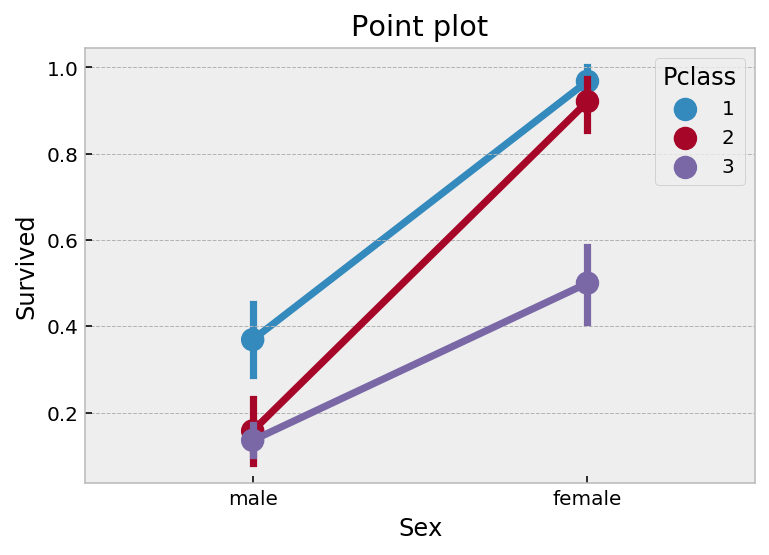

In [371]:
#Pointplot of the survival between male and female on the ship 
ax24 = fig.add_subplot(141)
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.title('Point plot')

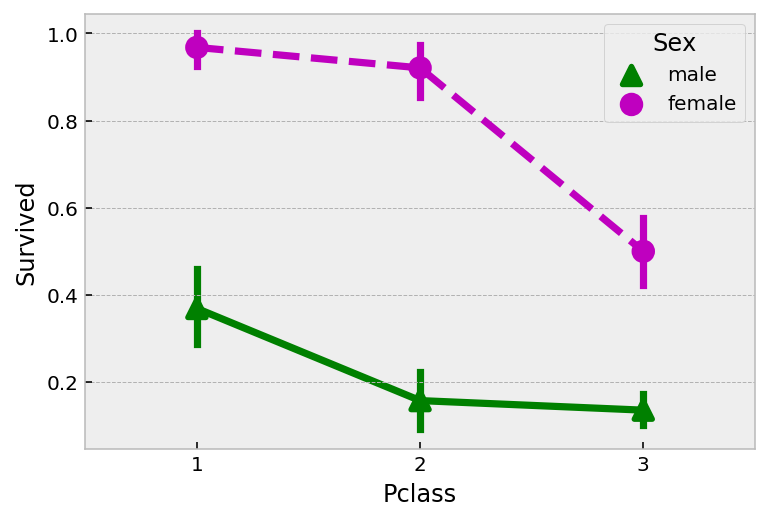

In [372]:
#Survival ratio according to te passenger class between male and female on Titanic 
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

Looking at the point plot, the survival count of the passengers started to drop down with respect to the passenger class. One of the reasons why females tend to have a higher survival chance compared to males is due to evacuative measures typically focusing on "Women and Children first", portraying the pink and green trendline.

## Further Data Visualizations

#### Which Gender survived more? 

Looking at the pointplot above, we can see that females survived more than males on the Titanic, but now the goal is to understand how their survival counts mattered across different spectrums such as passenger class, family size and fare rates.

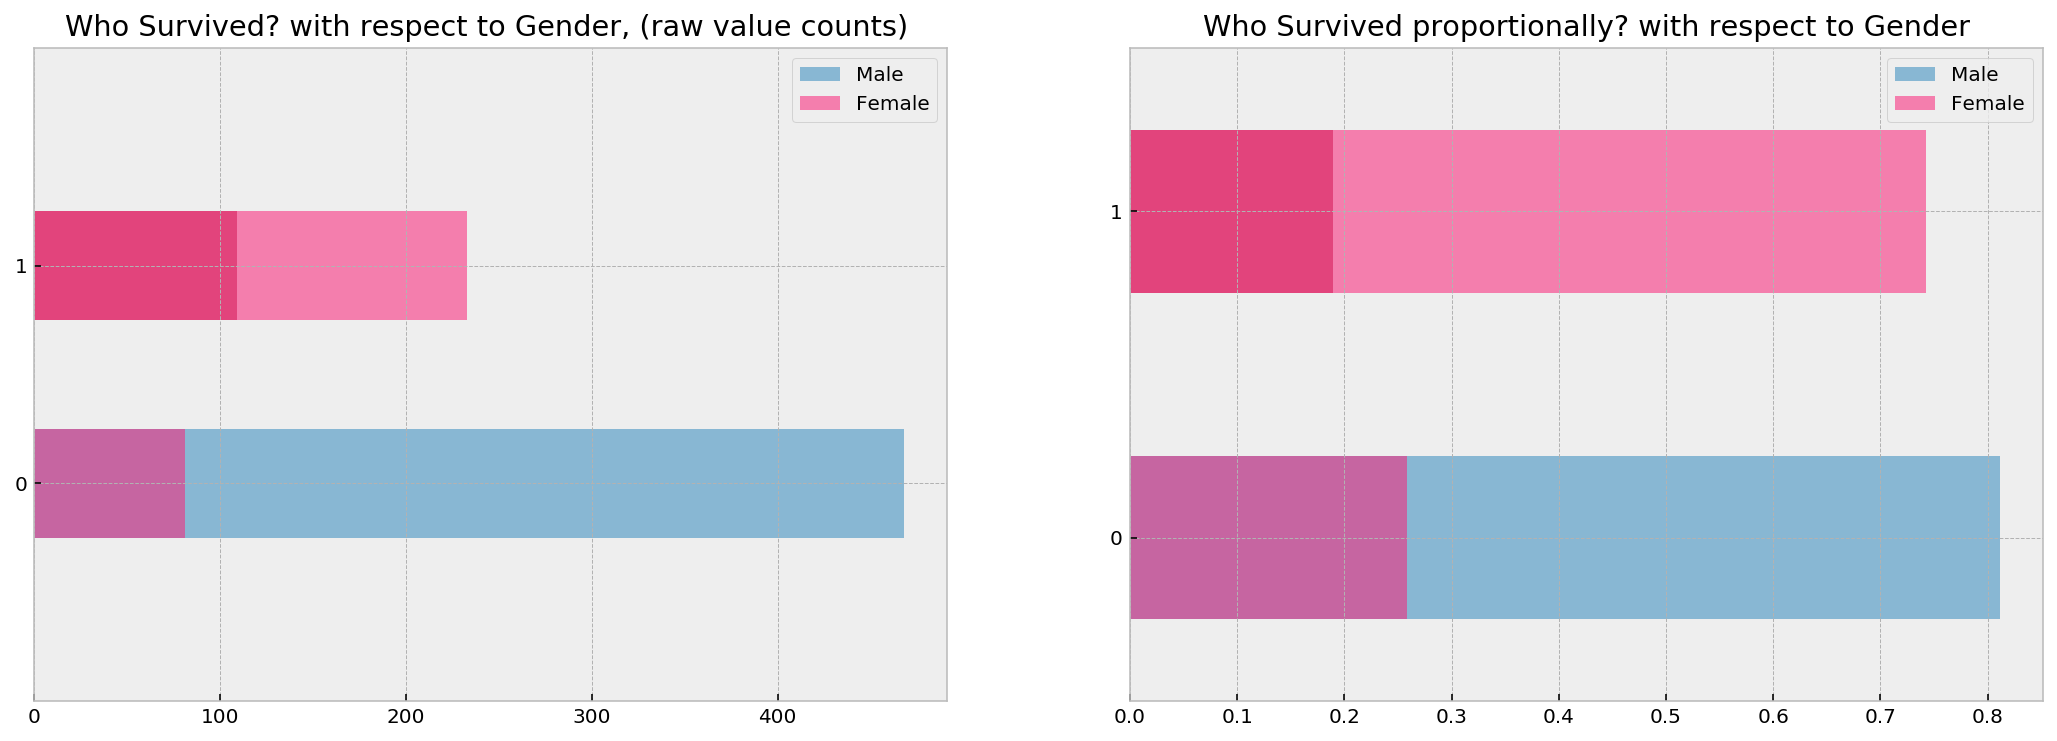

In [373]:
fig = plt.figure(figsize=(18,6))


df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

Looking at the graph, it is evident that female passengers survived (25%) more than male passengers (20%)

Text(0.5,1,'Survival of Female Passengers (3)')

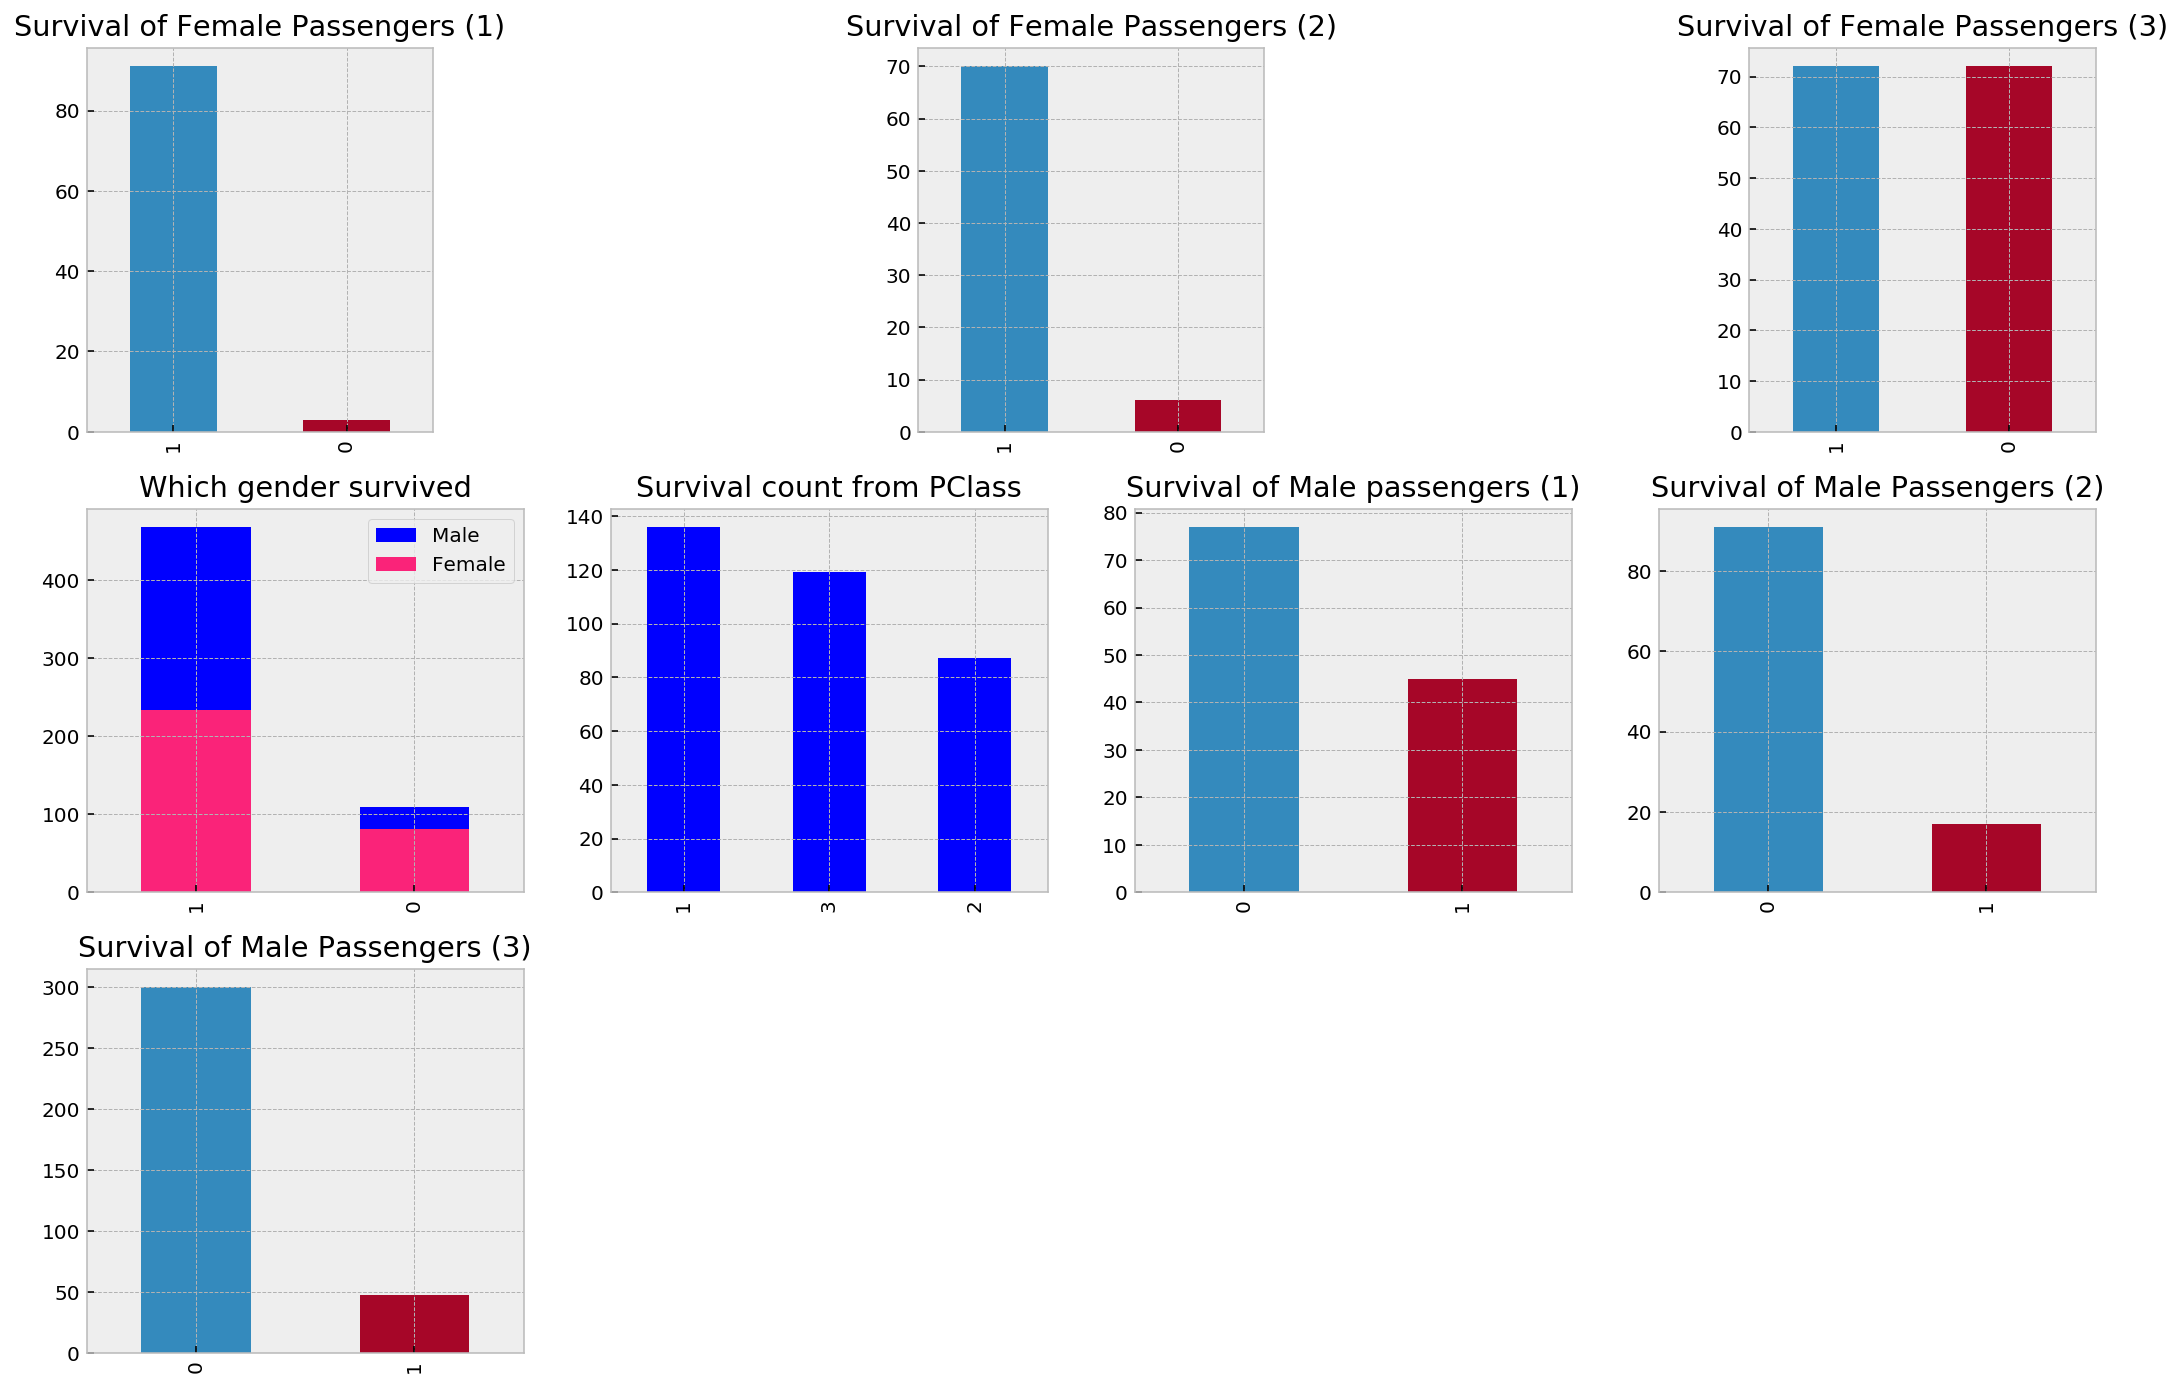

In [374]:
fig = plt.figure(figsize=(18, 12))

ax2 = fig.add_subplot(345)
ms_pclass = df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar', label='Male', color='blue')
fs_pclass = df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', label='Female', color='#FA2379')
plt.legend(loc='best')
plt.title('Which gender survived')

ax3 = fig.add_subplot(346)
class1_survived = df.Pclass[df.Survived == 1].value_counts().plot(kind='bar', color = 'red')
class2_survived = df.Pclass[df.Survived == 1].value_counts().plot(kind='bar', color = 'green')
class3_survived = df.Pclass[df.Survived == 1].value_counts().plot(kind='bar', color = 'blue')
plt.title('Survival count from PClass')

ax4 = fig.add_subplot(347)
male1_sur = df.Survived[df.Sex == 'male'][df.Pclass == 1].value_counts().plot(kind='bar')
plt.title('Survival of Male passengers (1)')


ax5 = fig.add_subplot(348)
male2_sur = df.Survived[df.Sex == 'male'][df.Pclass == 2].value_counts().plot(kind='bar')
plt.title('Survival of Male Passengers (2)')

ax6 = fig.add_subplot(349)
male3_sur = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts().plot(kind='bar')
plt.title('Survival of Male Passengers (3)')

ax7 = fig.add_subplot(351)
female1_sur = df.Survived[df.Sex == 'female'][df.Pclass == 1].value_counts().plot(kind='bar')
plt.title('Survival of Female Passengers (1)')

ax8 = fig.add_subplot(353)
female2_sur = df.Survived[df.Sex == 'female'][df.Pclass == 2].value_counts().plot(kind='bar')
plt.title('Survival of Female Passengers (2)')

ax9 = fig.add_subplot(355)
female3_sur = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts().plot(kind='bar')
plt.title('Survival of Female Passengers (3)')

### What do we find from the above plots
* Female passengers had a much higher survival count in Class 1, but also had a higher death rate in Class 3
* Passenger class 3 would have shown a higher death count, but turns out passenger class 2 had a higher death count than passenger class 3
* Most males were dead across all the three passenger classes.

### Checking trends and patterns across variables using correlation and regression

Text(0.5,1,'Survival rate on Titanic')

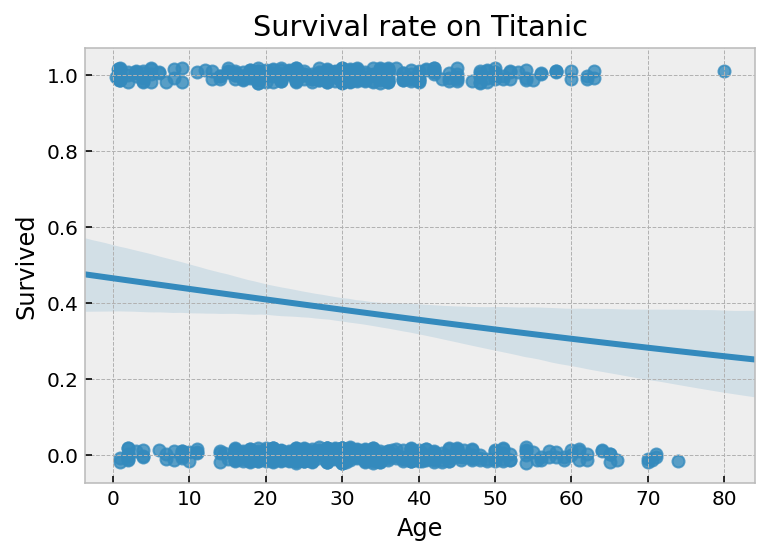

In [375]:
#Was there a correlation between the survival and the age category of the passengers?
sns.regplot(x="Age", y="Survived", data=df, logistic=True, y_jitter=0.02)
plt.title('Survival rate on Titanic')

As expected, the survival rate across age groups declined, but how correct is our inference here? To check that, Logit regression analysis needs to be conducted.

In [376]:
#Getting the same output in rpy2
from rpy2.robjects import Formula
glm = ro.r['glm']
formula = Formula('Survived ~ Age')
fit = glm(formula, data=df, family="binomial")
print(ro.r.summary(fit))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [377]:
%%R -i r_df
logistic_fit = glm(Survived ~ Age, data=r_df, family="binomial")
summary(logistic_fit)


Call:
glm(formula = Survived ~ Age, family = "binomial", data = r_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1144  -0.9865  -0.9428   1.3610   1.6411  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.13862    0.17236  -0.804   0.4213  
Age         -0.01133    0.00539  -2.102   0.0355 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance: 1182.2  on 889  degrees of freedom
AIC: 1186.2

Number of Fisher Scoring iterations: 4



As expected, the survival of passengers does depend on their age

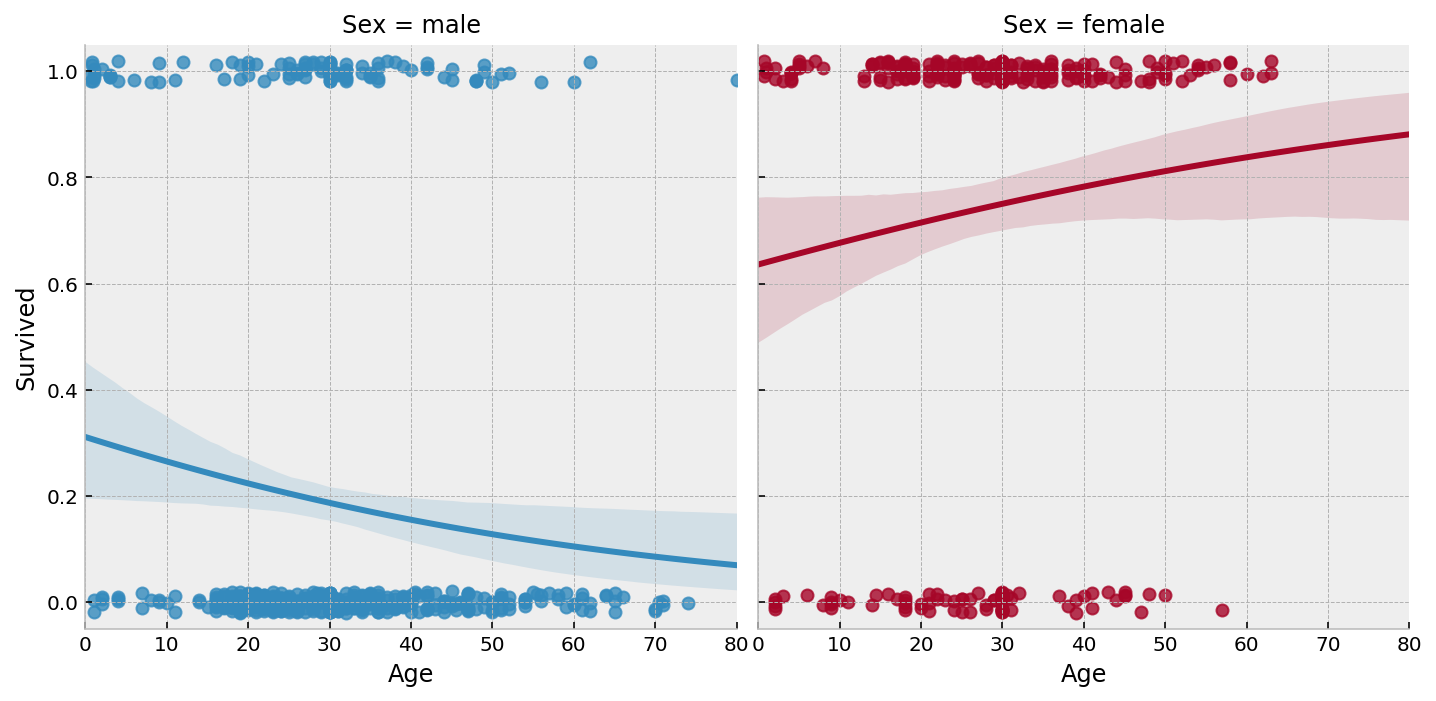

In [378]:
#What about survival rate amongst gender of different ages?
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=df, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

Text(0.5,1,'Survival rate in Class 3')

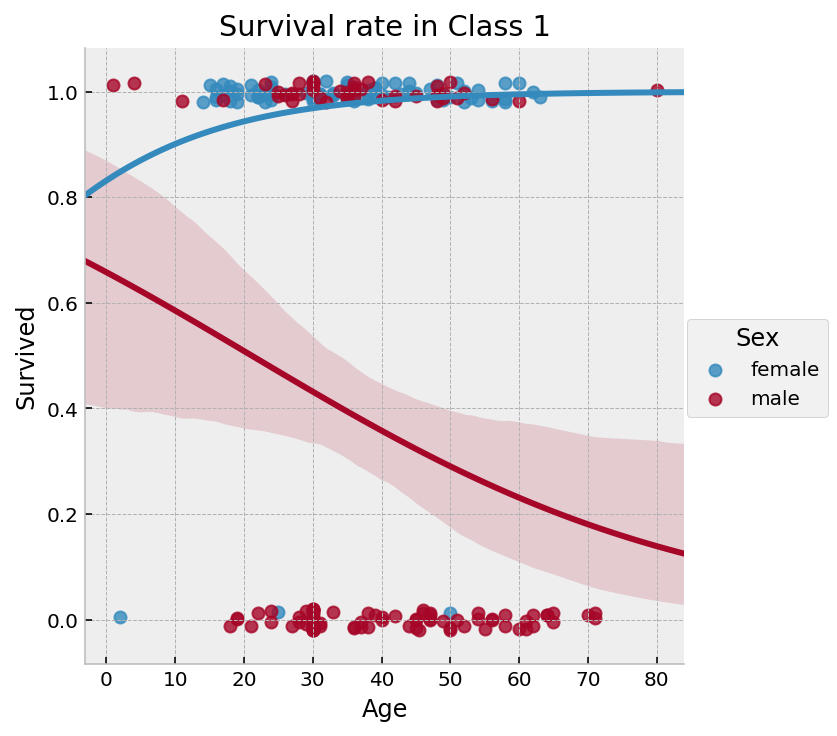

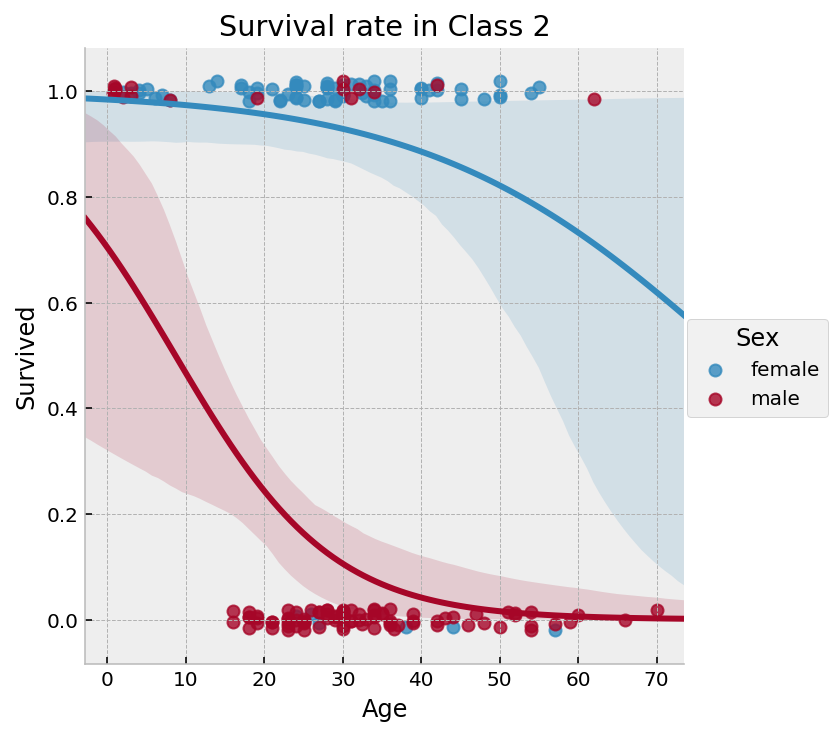

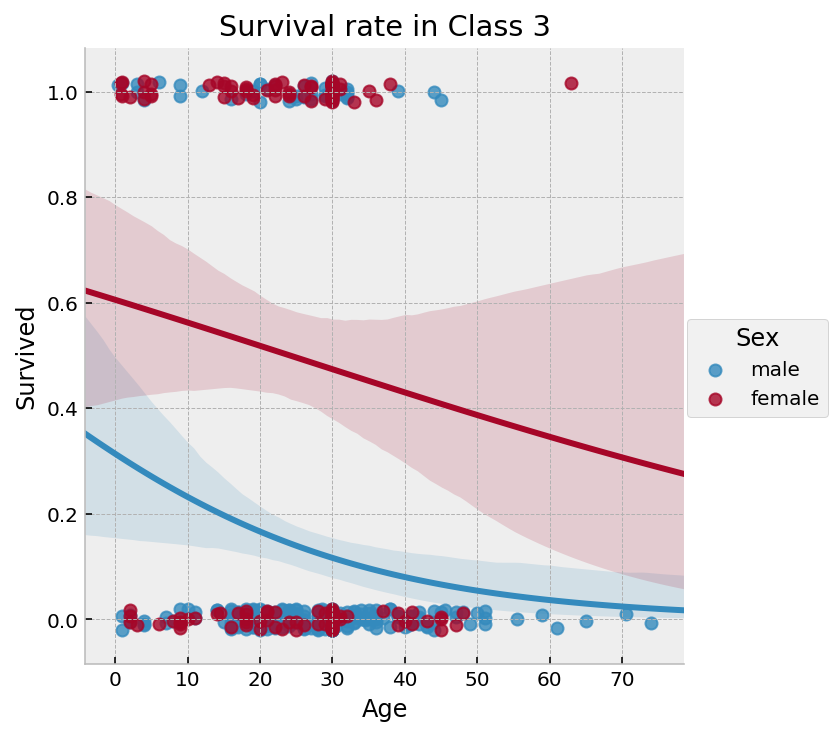

In [379]:
#Did the passenger class play an important role in deciding who got to evacuate the Titanic first?
passenger_c1 = df[df.Pclass == 1]
passenger_c2 = df[df.Pclass == 2]
passenger_c3 = df[df.Pclass == 3]

p1 = sns.lmplot(x="Age", y="Survived",  hue="Sex", data=passenger_c1, y_jitter=.02, logistic=True)
plt.title('Survival rate in Class 1')
p2 = sns.lmplot(x="Age", y="Survived", data=passenger_c2, hue="Sex",y_jitter=.02, logistic=True)
plt.title('Survival rate in Class 2')
p3 = sns.lmplot(x="Age", y="Survived", data=passenger_c3, hue="Sex", y_jitter=.02, logistic=True)
plt.title('Survival rate in Class 3')

#### An interesting observation made here was that if the passenger belonged to a higher class of travelling, their survival chances were higher compared to those passengers who belonged to lower classes of travelling (namely Class 2 and Class 3). But the correlation of higher class remains with paying a higher boarding fee. Is there a strong claim that paying a higher fee lead to increased chances of survival?

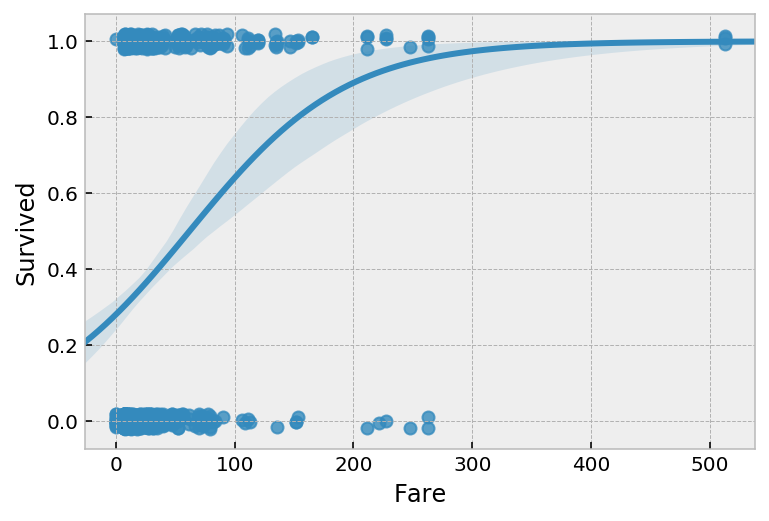

In [380]:
fare_survival = sns.regplot(x="Fare", y="Survived", data=df, y_jitter=.02, logistic=True)

Testing the above inference using Logit regression analysis, the data holds true for its assumption.

In [381]:
%%R -i r_df
fare_fit = glm(Survived ~ Fare, data=r_df, family="binomial")
summary(fare_fit)


Call:
glm(formula = Survived ~ Fare, family = "binomial", data = r_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4906  -0.8878  -0.8531   1.3429   1.5942  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.941330   0.095129  -9.895  < 2e-16 ***
Fare         0.015197   0.002232   6.810 9.79e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance: 1117.6  on 889  degrees of freedom
AIC: 1121.6

Number of Fisher Scoring iterations: 4



### One more observation which was left unnoticed was the SibSp column; Siblings and Spouses each passenger had

Text(0.5,1,'Sibling/Spouse count')

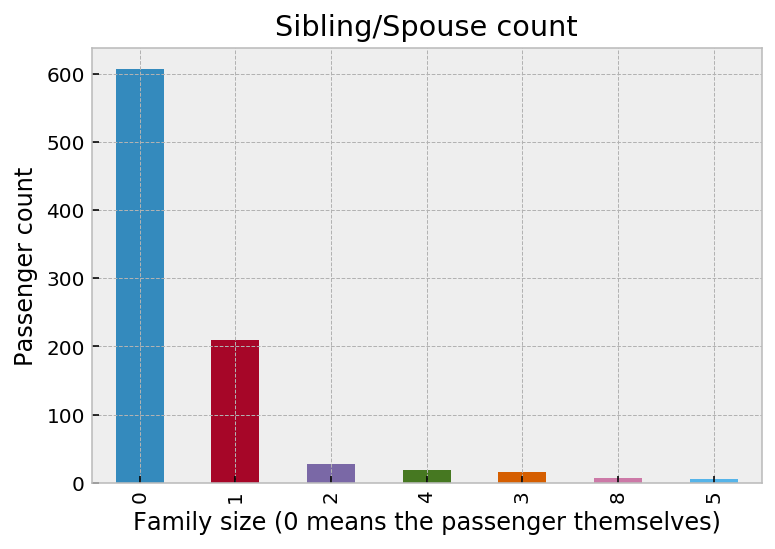

In [382]:
sib_sp = df.SibSp.value_counts().plot(kind="bar")
plt.xlabel("Family size (0 means the passenger themselves)")
plt.ylabel("Passenger count")
plt.title("Sibling/Spouse count")

The next step is to see if there was an association between the family size and the survival of the passengers. This calls for Chi-Square contingency test

In [383]:
family_survival_ctable = pd.crosstab(df.Survived, df.SibSp)
family_survival_ctable

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [384]:
%%R -i family_survival_ctable
chisq.test(family_survival_ctable)


	Pearson's Chi-squared test

data:  family_survival_ctable
X-squared = 37.272, df = 6, p-value = 1.559e-06



With a p-value of 1.59e-06, the null hypothesis is rejected and can be claimed that the family count affected the survival chances of the passengers

## Predicting which passenger survives

After the exploratory data analysis has been conducted, now its time to apply modelling to predict which passengers survive at the end.

##### Some inferences drawn from above EDA and Inferential Tests

* Women had a higher chance of survival and this chance significantly increased with age
* Passengers from Class 1 survived the most
* Family size affected your survival chances; if you came with a family, you were in for trouble
* Paying a higher fare lead to your increased survival chances

### Model 1: Logistic Regression

The first step for Logistic regression is to do a logistic regression analysis and check which variables affect the dependent variable the most

In [463]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex_encoded,Embarked_encoded,Title,FareBand
0,1,0,3,male,22.0,1,0,S,1,2,1,1
1,2,1,1,female,38.0,1,0,C,0,0,3,4
2,3,1,3,female,26.0,0,0,S,0,2,2,2
3,4,1,1,female,35.0,1,0,S,0,2,3,4
4,5,0,3,male,35.0,0,0,S,1,2,1,2


In [465]:
%%R -i r_df
lm1 <- glm(Survived~Pclass+Sex_encoded+Age+SibSp+Parch+Embarked_encoded+Title+FareBand, data=r_df, family=binomial)
summary(lm1)


Call:
glm(formula = Survived ~ Pclass + Sex_encoded + Age + SibSp + 
    Parch + Embarked_encoded + Title + FareBand, family = binomial, 
    data = r_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4139  -0.5676  -0.3845   0.6104   2.4675  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.619243   0.687292   5.266 1.39e-07 ***
Pclass           -0.805616   0.169925  -4.741 2.13e-06 ***
Sex_encoded      -2.448279   0.209400 -11.692  < 2e-16 ***
Age              -0.041033   0.007893  -5.199 2.01e-07 ***
SibSp            -0.521136   0.131574  -3.961 7.47e-05 ***
Parch            -0.291922   0.132007  -2.211   0.0270 *  
Embarked_encoded -0.225227   0.117622  -1.915   0.0555 .  
Title             0.359990   0.085605   4.205 2.61e-05 ***
FareBand2         0.187268   0.284769   0.658   0.5108    
FareBand3         0.696857   0.329100   2.117   0.0342 *  
FareBand4         0.961654   0.429823   2.237   0.0253 *  
---
Sig

In [466]:
fitted = smf.glm(formula="Survived~Pclass+Sex_encoded+Age+SibSp+Parch+Embarked_encoded+Title+FareBand", data=df, family=sm.families.Binomial()).fit()
print(fitted.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -380.41
Date:                Sun, 13 May 2018   Deviance:                       760.83
Time:                        22:31:12   Pearson chi2:                     886.
No. Iterations:                     5                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6192      0.687      5.266      0.000       2.272       4.966
FareBand[T.2]        0.1873      0

There appears to be a problem with the regression results as "Sex" seems to show only for males here. Perhaps encoding it with binaries of 0 and 1 may fix the problem

In [788]:
df["Sex"] = df["Sex"].astype('category')
df["Embarked"] = df["Embarked"].astype('category')
df["Sex_encoded"] = df["Sex"].cat.codes
df["Embarked_encoded"] = df["Embarked"].cat.codes
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0


Now that "Sex" and "Embarked" has been encoded, lets re-run the regression results to check how the new analysis compared than its previous one

In [389]:
fitted2 = smf.glm(formula="Survived~Pclass+Sex_encoded+Age+SibSp+Fare+Embarked_encoded+Parch", data=df, family=sm.families.Binomial()).fit()
print(fitted2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -392.34
Date:                Sun, 13 May 2018   Deviance:                       784.67
Time:                        22:01:28   Pearson chi2:                     900.
No. Iterations:                     5                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3031      0.566      9.376      0.000       4.195       6.412
Pclass              -1.0833      0

With the results out, the variables which affect the dependent variable the most are:
* Pclass
* Sex
* Age
* Sibsp
* Embarkation

### Loading in the "test" dataset on which the model will be tested for its predictions

In [792]:
df_test = pd.read_csv("file:///Users/Sauraj/Desktop/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [391]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [793]:
#Encoding "Sex" and "Embarked" for the testing dataset 
df_test["Sex"] = df_test["Sex"].astype('category')
df_test["Embarked"] = df_test["Embarked"].astype('category')
df_test["Sex_encoded"] = df_test["Sex"].cat.codes
df_test["Embarked_encoded"] = df_test["Embarked"].cat.codes

#### Next, split the training and testing features into different objects

In [794]:
y = df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [795]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2


In [799]:
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_encoded,Embarked_encoded
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,2
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,1,2
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,0,1
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,1,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,0,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,1,2


#### How many features are to be needed at the most for a accurate classification?

Optimal number of features: 4
Selected features: ['Pclass', 'SibSp', 'Sex_encoded', 'Embarked_encoded']


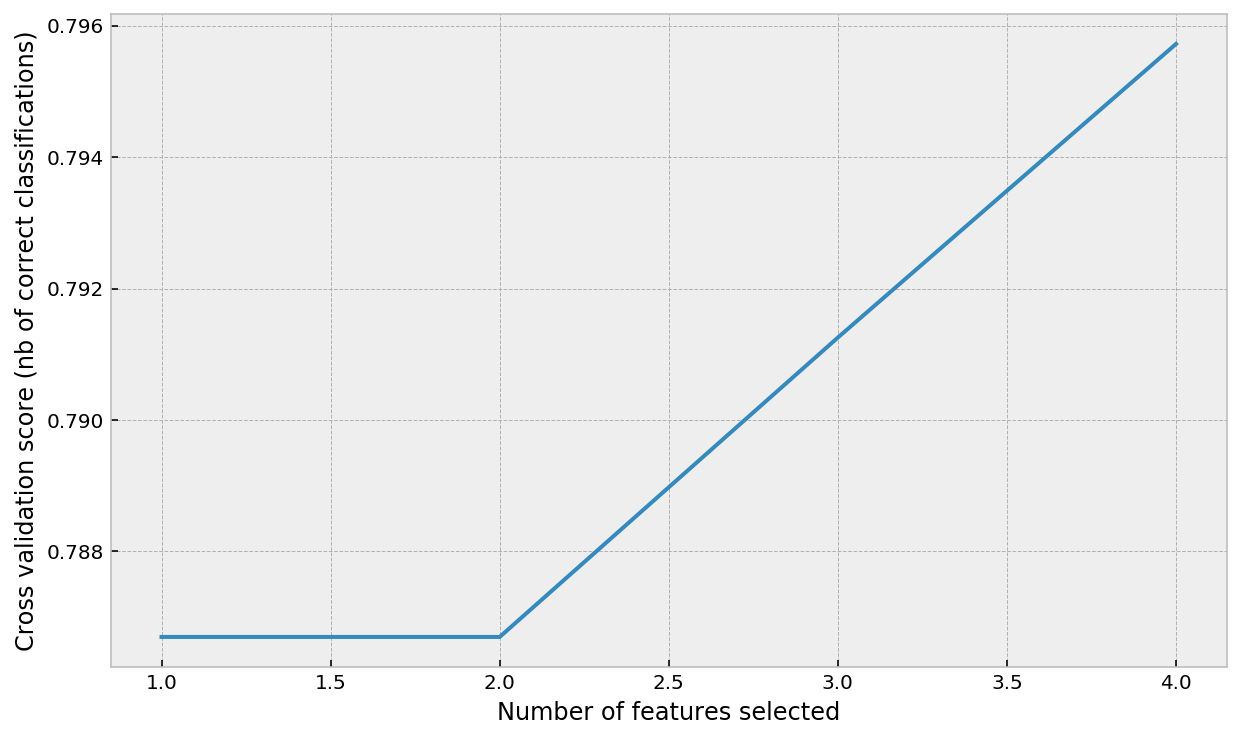

In [471]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Feature Engineering

The next step of the analysis is to preprocess the datasets and impute in missing values properly so that they better tend to fit for algorithms.

##### Lets remove the Cabin and Ticket columns from the dataset since they are of no use and do not contain enough information for analytics

In [800]:
df = df.drop(["Ticket", "Cabin"], axis=1)

In [801]:
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It is quite obvious that most passengers boarded from Southampton, hence we can fill in all the NaN values of Embarked column with Southampton as the embarkation location.

In [802]:
df = df.fillna({"Embarked": "S"})

In [803]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2


Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [804]:
combine = [df, df_test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Replace various title with more prevalent names

In [805]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [806]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2,1


The next step is to drop the name feature from the dataset

In [807]:
for x in range(len(df_test["Fare"])):
    if pd.isnull(df_test["Fare"][x]):
        pclass = df_test["Pclass"][x] #Pclass = 3
        df_test["Fare"][x] = round(df[df["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
df_test['FareBand'] = pd.qcut(df_test['Fare'], 4, labels = [1, 2, 3, 4])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [811]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded,Title,FareBand
0,1,0,3,22.0,1,0,7.2500,1,2,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,3,4
2,3,1,3,26.0,0,0,7.9250,0,2,2,2
3,4,1,1,35.0,1,0,53.1000,0,2,3,4
4,5,0,3,35.0,0,0,8.0500,1,2,1,2


In [810]:
df = df.drop(["Name", "Sex", "Embarked"], axis=1)

In [815]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded,Title,FareBand
0,892,3,34.5,0,0,7.8292,1,1,1,1
1,893,3,47.0,1,0,7.0000,0,2,3,1
2,894,2,62.0,0,0,9.6875,1,1,1,2
3,895,3,27.0,0,0,8.6625,1,2,1,2
4,896,3,22.0,1,1,12.2875,0,2,3,2


In [814]:
df_test = df_test.drop(["Name", "Ticket"],axis=1)

## Model selection and accuracy testing

#### The following models shall be used for predicting the values of Survival for the test data
* Logistic Regression
* Linear Discriminant Analysis
* Quadrant Discriminant Analysis
* K-nearest neighbors
* Support Vector Machines
* Decision Tree Classifier
* Random Forests
* Gradient Boosting

#### But first, the dataset needs to be resampled accordinly for training and testing

In [550]:
X = df.drop(["PassengerId", "Survived", "Embarked", "Sex"], axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [488]:
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [517]:
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=1)
svc = SVC()
dtrees = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

### Model 1: Logistic Regression

In [816]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [817]:
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_pred, y_test)
print(logreg_acc)

0.8171641791044776


### Model 2: Linear Disciminant Analysis

In [818]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [819]:
y_pred2 = logreg.predict(X_test)
lda_acc = accuracy_score(y_pred2, y_test)
print(lda_acc)

0.8171641791044776


### Model 3: Quadratic Discriminant Analysis

In [820]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [821]:
y_pred3 = qda.predict(X_test)
qda_acc = accuracy_score(y_pred3, y_test)
print(qda_acc)

0.8097014925373134


### Model 4 : K-nearest Neighbors

In [822]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [823]:
y_pred4 = knn.predict(X_test)
knn_acc = accuracy_score(y_pred4, y_test)
print(knn_acc)

0.7574626865671642


### Model 5: Support Vector Machines

In [824]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [825]:
y_pred5 = svc.predict(X_test)
svc_acc = accuracy_score(y_pred5,y_test)
print(svc_acc)

0.832089552238806


### Model 6: Decision Trees 

In [826]:
dtrees.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [827]:
y_pred6 = dtrees.predict(X_test)
dtrees_acc = accuracy_score(y_pred6, y_test)
print(dtrees_acc)

0.7761194029850746


### Model 7: Random Forests

In [828]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [829]:
y_pred7 = rf.predict(X_test)
rf_acc = accuracy_score(y_pred7, y_test)
print(rf_acc)

0.8097014925373134


### Model 8: Gradient Boosting 

In [837]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [839]:
y_pred8 = gb.predict(X_test)
gb_acc = accuracy_score(y_pred8, y_test)
print(gb_acc)

0.8656716417910447


In [843]:
df_test["Age"] = df_test["Age"].fillna(30)


#### Turns out Gradient Boosting gives the highest accuracy at 86.56%. Hence lets take the test data and feed it into the GB model

In [851]:
X_trainer = df_test.drop(["PassengerId", "Fare"], axis=1)

In [858]:
predictions = gb.predict(X_trainer)
ids = df_test["PassengerId"]

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv')